**IMPORT LIBRARIES**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math as math
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.linear_model import LinearRegression

**READ THE DATASET AND STORE IT TO df**

In [6]:
path='https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv'
df=pd.read_csv(path,low_memory=False,nrows=10**5,parse_dates=["date_time_of_pickup"])

**Performing basic EDA to understand the structure of the data**

In [7]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [8]:
df.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [9]:
df.shape

(50000, 8)

**FIND THE MISSING VALUES**

In [10]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

**DROP UNWANTED COLUMNS**

In [11]:
df=df.drop(["unique_id"],axis=1)

In [12]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


**EXTRACT DAY,MONTH,YEAR USING CALENDER MODULE**

In [13]:
import calendar

df['pickup_date']=df['date_time_of_pickup'].dt.date
df['pickup_day']=df['date_time_of_pickup'].apply(lambda x:x.day)
df['pickup_hour']=df['date_time_of_pickup'].apply(lambda x:x.hour)
df['pickup_day_of_week']=df['date_time_of_pickup'].apply(lambda x:calendar.day_name[x.weekday()])
df['pickup_month']=df['date_time_of_pickup'].apply(lambda x:x.month)
df['pickup_year']=df['date_time_of_pickup'].apply(lambda x:x.year)
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [14]:
df.dtypes

amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
pickup_date                          object
pickup_day                            int64
pickup_hour                           int64
pickup_day_of_week                   object
pickup_month                          int64
pickup_year                           int64
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   amount                50000 non-null  float64            
 1   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 2   longitude_of_pickup   50000 non-null  float64            
 3   latitude_of_pickup    50000 non-null  float64            
 4   longitude_of_dropoff  50000 non-null  float64            
 5   latitude_of_dropoff   50000 non-null  float64            
 6   no_of_passenger       50000 non-null  int64              
 7   pickup_date           50000 non-null  object             
 8   pickup_day            50000 non-null  int64              
 9   pickup_hour           50000 non-null  int64              
 10  pickup_day_of_week    50000 non-null  object             
 11  pickup_month          50000 non-null  int64              
 12  pick

In [16]:
df.isnull().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
pickup_date             0
pickup_day              0
pickup_hour             0
pickup_day_of_week      0
pickup_month            0
pickup_year             0
dtype: int64

<Axes: xlabel='no_of_passenger', ylabel='count'>

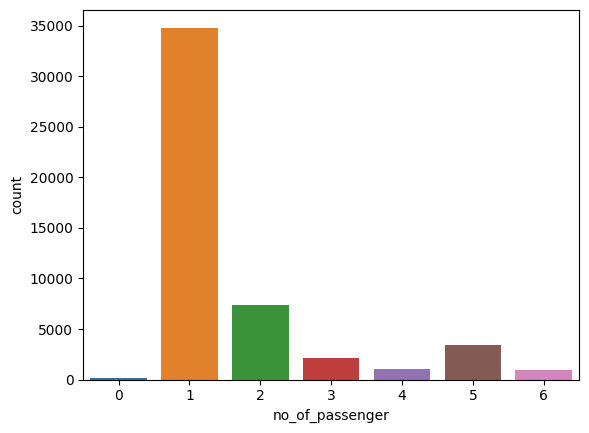

In [17]:
sns.countplot(x="no_of_passenger",data=df)

** From the graph ,mejority of people travelled alone**

<Axes: xlabel='pickup_year', ylabel='count'>

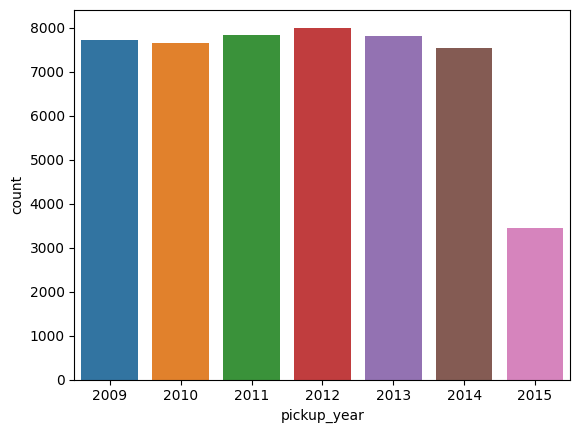

In [18]:
sns.countplot(x="pickup_year",data=df)

<Axes: xlabel='pickup_day_of_week', ylabel='count'>

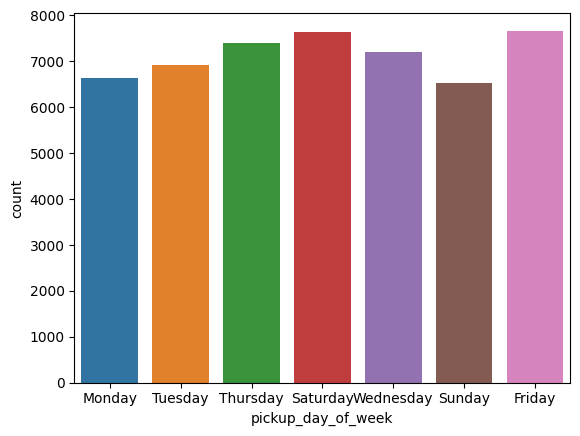

In [19]:
sns.countplot(x="pickup_day_of_week",data=df)

more people travelled on Friday

<function matplotlib.pyplot.show(close=None, block=None)>

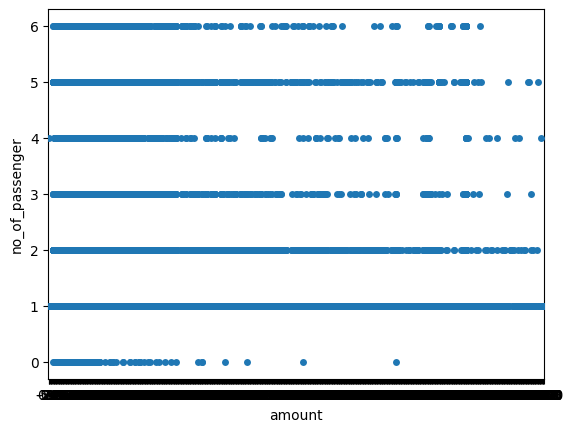

In [20]:
sns.stripplot(x=df['amount'],y=df['no_of_passenger'])
plt.show

<Axes: xlabel='amount', ylabel='no_of_passenger'>

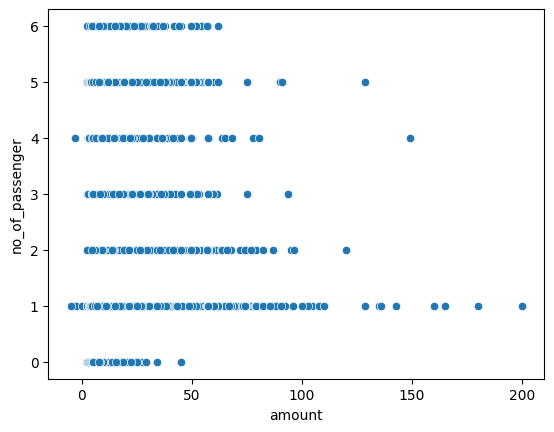

In [22]:
sns.scatterplot(x='amount',y='no_of_passenger',data=df)

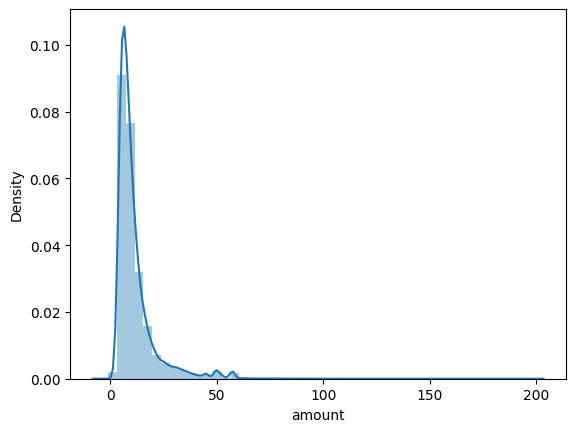

In [23]:
sns.distplot(df["amount"])
plt.show()

From the graph From the graph,amount is in range of 0-25

In [24]:
### dealing with missing value
### quick summary of dara columns
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_month,pickup_year
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,15.672040,13.489080,6.273300,2011.739260
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,8.660789,6.506935,3.461157,1.862639
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,31.000000,23.000000,12.000000,2015.000000


In [25]:
df.describe(include="all")

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
count,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000,50000.000000,50000.000000,50000,50000.000000,50000.000000
unique,NaN,49555,NaN,NaN,NaN,NaN,NaN,2371,NaN,NaN,7,NaN,NaN
top,NaN,2011-09-03 01:30:00+00:00,NaN,NaN,NaN,NaN,NaN,2012-12-01,NaN,NaN,Friday,NaN,NaN
freq,NaN,3,NaN,NaN,NaN,NaN,NaN,42,NaN,NaN,7668,NaN,NaN
first,NaN,2009-01-01 01:31:49+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-06-30 22:42:39+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840,NaN,15.672040,13.489080,NaN,6.273300,2011.739260
std,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195,NaN,8.660789,6.506935,NaN,3.461157,1.862639
min,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,NaN,1.000000,0.000000,NaN,1.000000,2009.000000
25%,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000,NaN,8.000000,9.000000,NaN,3.000000,2010.000000


Minimum Fare-Amount is Negative, so we have to remove these observations


In [26]:
df=df[df['amount']>=0]
len(df)

49994

**Histogram of fare amount**

<Axes: xlabel='amount'>

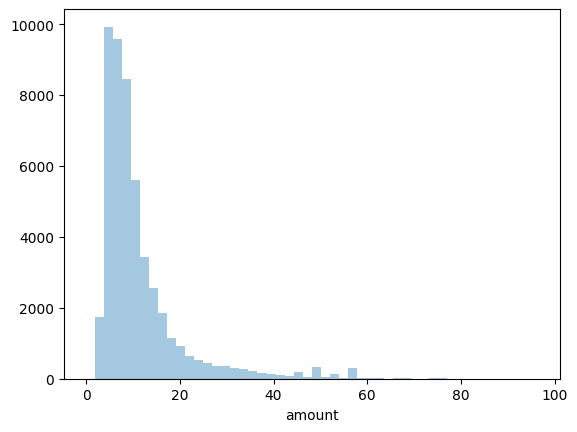

In [27]:
sns.distplot(df[df['amount']<100]['amount'],kde=False)

In [28]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_month,pickup_year
count,49994.000000,49994.000000,49994.000000,49994.000000,49994.000000,49994.000000,49994.000000,49994.000000,49994.000000,49994.000000
mean,11.365903,-72.509586,39.933665,-72.505922,39.926970,1.667860,15.671701,13.489219,6.273473,2011.739049
std,9.684843,10.394472,6.225225,10.403131,6.012441,1.289213,8.660660,6.507007,3.461239,1.862546
min,0.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992062,40.734883,-73.991152,40.734375,1.000000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.981840,40.752679,-73.980082,40.753373,1.000000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.967153,40.767361,-73.963585,40.768167,2.000000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,31.000000,23.000000,12.000000,2015.000000


**Remove Missing Data and replacing categorical val with actual values**

In [29]:
###for replacing categorical val with actual values
df['pickup_day_of_week']=df['pickup_day_of_week'].replace({'Monday':1,'Tuesday':2,'Thursday':3,'Saturday':4,'Wednesday':5,'Sunday':6,'Friday':7})
df['pickup_year']=df['pickup_year'].replace({2012:1,2013:2,2011:3,2009:4,2010:5,2014:6,2015:7})
df.drop(['date_time_of_pickup','pickup_date'],axis=1,inplace=True)


In [30]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,4
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,5
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,3,8,3
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,4,4,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,5


In [31]:
df.dtypes

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
pickup_day                int64
pickup_hour               int64
pickup_day_of_week        int64
pickup_month              int64
pickup_year               int64
dtype: object

**For distance calculation**

In [32]:
def distance(lat1,lon1,lat2,lon2):
  p=0.017453292519943295   #pi/180
  a=0.5-np.cos((lat2-lat1)*p)/2+np.cos(lat1*p)*np.cos(lat2*p)*(1-np.cos((lon2-lon1)*p))/2
  return 0.6213712*12742*np.arcsin(np.sqrt(a))

In [33]:
df['distance_miles']=distance(df['latitude_of_pickup'],df['longitude_of_pickup'],df['latitude_of_dropoff'],df['longitude_of_dropoff'])

In [34]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,4,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,5,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,3,8,3,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,4,4,1,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,5,1.242218


**SPLIT THA DATA AND BUILD LINEAR MODEL**

In [35]:
###independent variables
X=df.drop(['amount'],axis=1)
##the dependent variable
y=df[['amount']]

In [36]:
###split x an y into training and test set in70:30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [37]:
#######FIT LINEAR MODEL
model_1=LinearRegression()
model_1.fit(X_train,y_train)
### here coefficient for each variable and the intercept
###the score(R^2) for in-sample and out of sample

LinearRegression()

In [39]:
model_1.score(X_train,y_train)

0.0027102201783074653

In [40]:
##out of sample score(R^2)
model_1.score(X_test,y_test)

0.0032309322973971266

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly=PolynomialFeatures(degree=1,interaction_only=True)
X_train2=poly.fit_transform(X_train)
X_test2=poly.fit_transform(X_test)

poly_clf=linear_model.LinearRegression()
poly_clf.fit(X_train2,y_train)


##y_pred=poly_clf.predict(X_test)
##print(y_pred)
##in sample (training)R^2 will always improve with the number of variable
print(poly_clf.score(X_train2,y_train))


0.0027102201783074653


In [42]:
## out off sample(testing) R^2 is our measure of succes and does improve
print(poly_clf.score(X_test2,y_test))

0.0032309322973971266


**FOR PAIRPLOT**

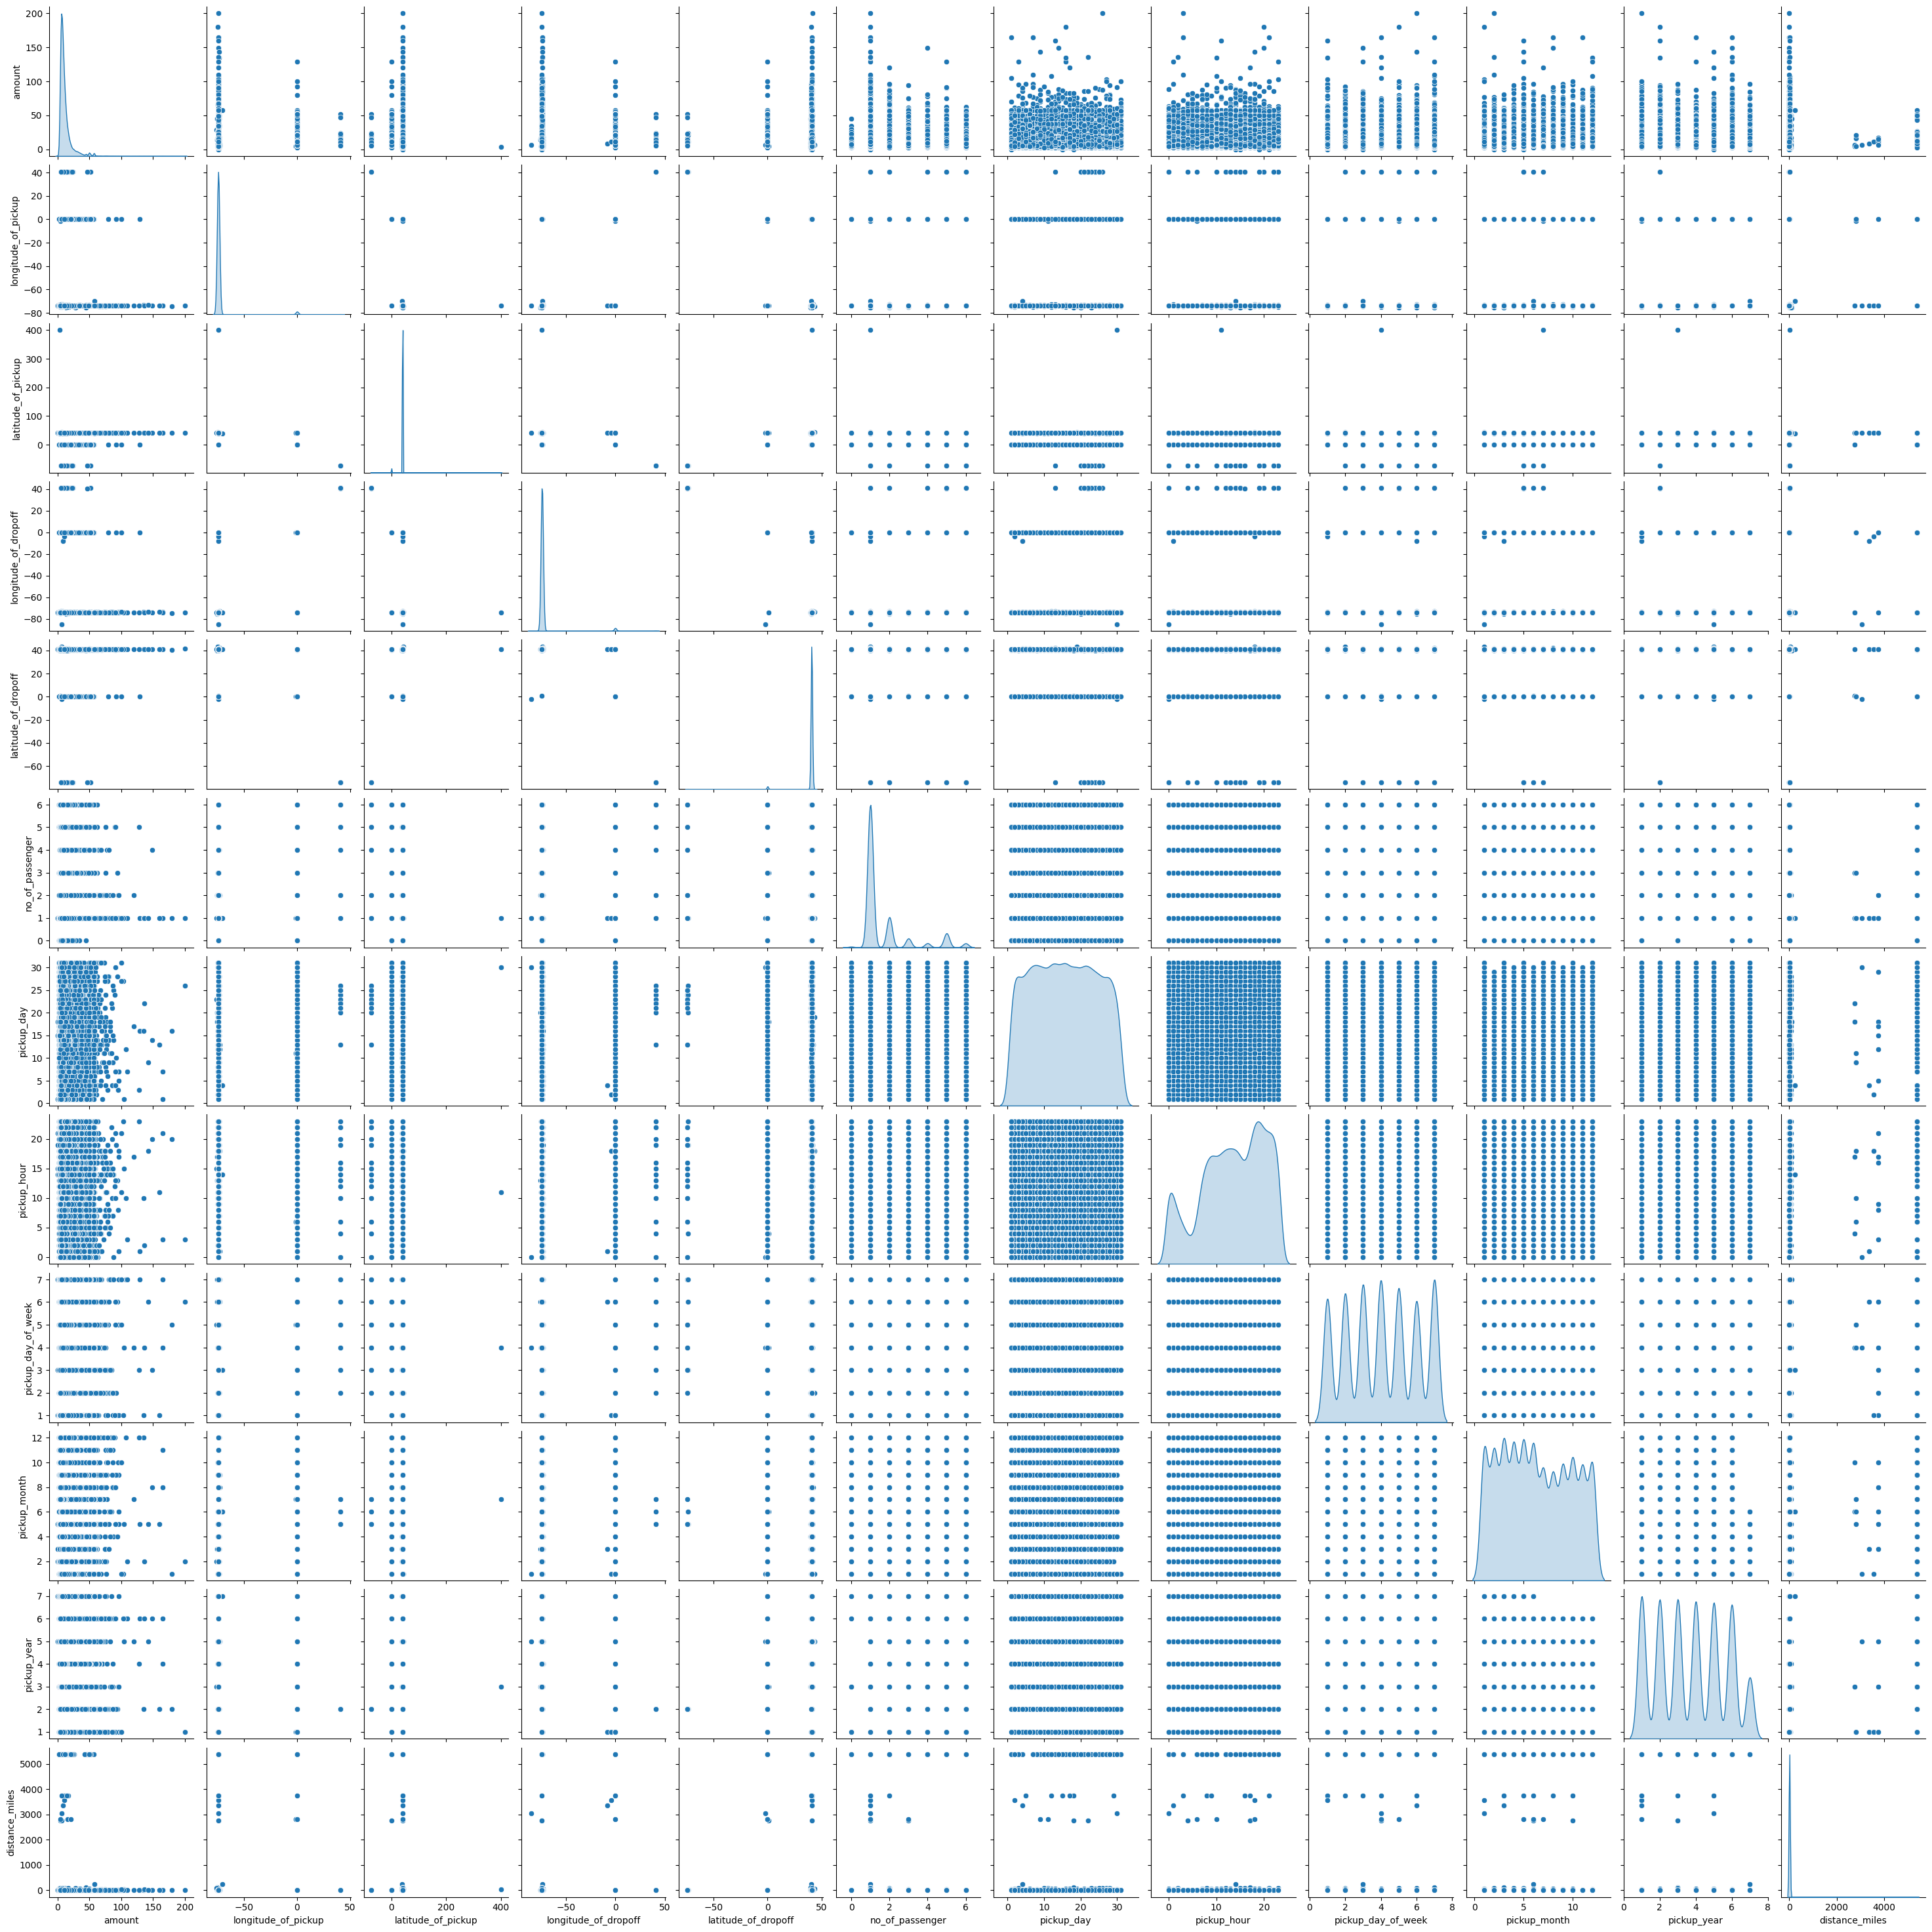

In [ ]:
sns.pairplot(df,diag_kind="kde")

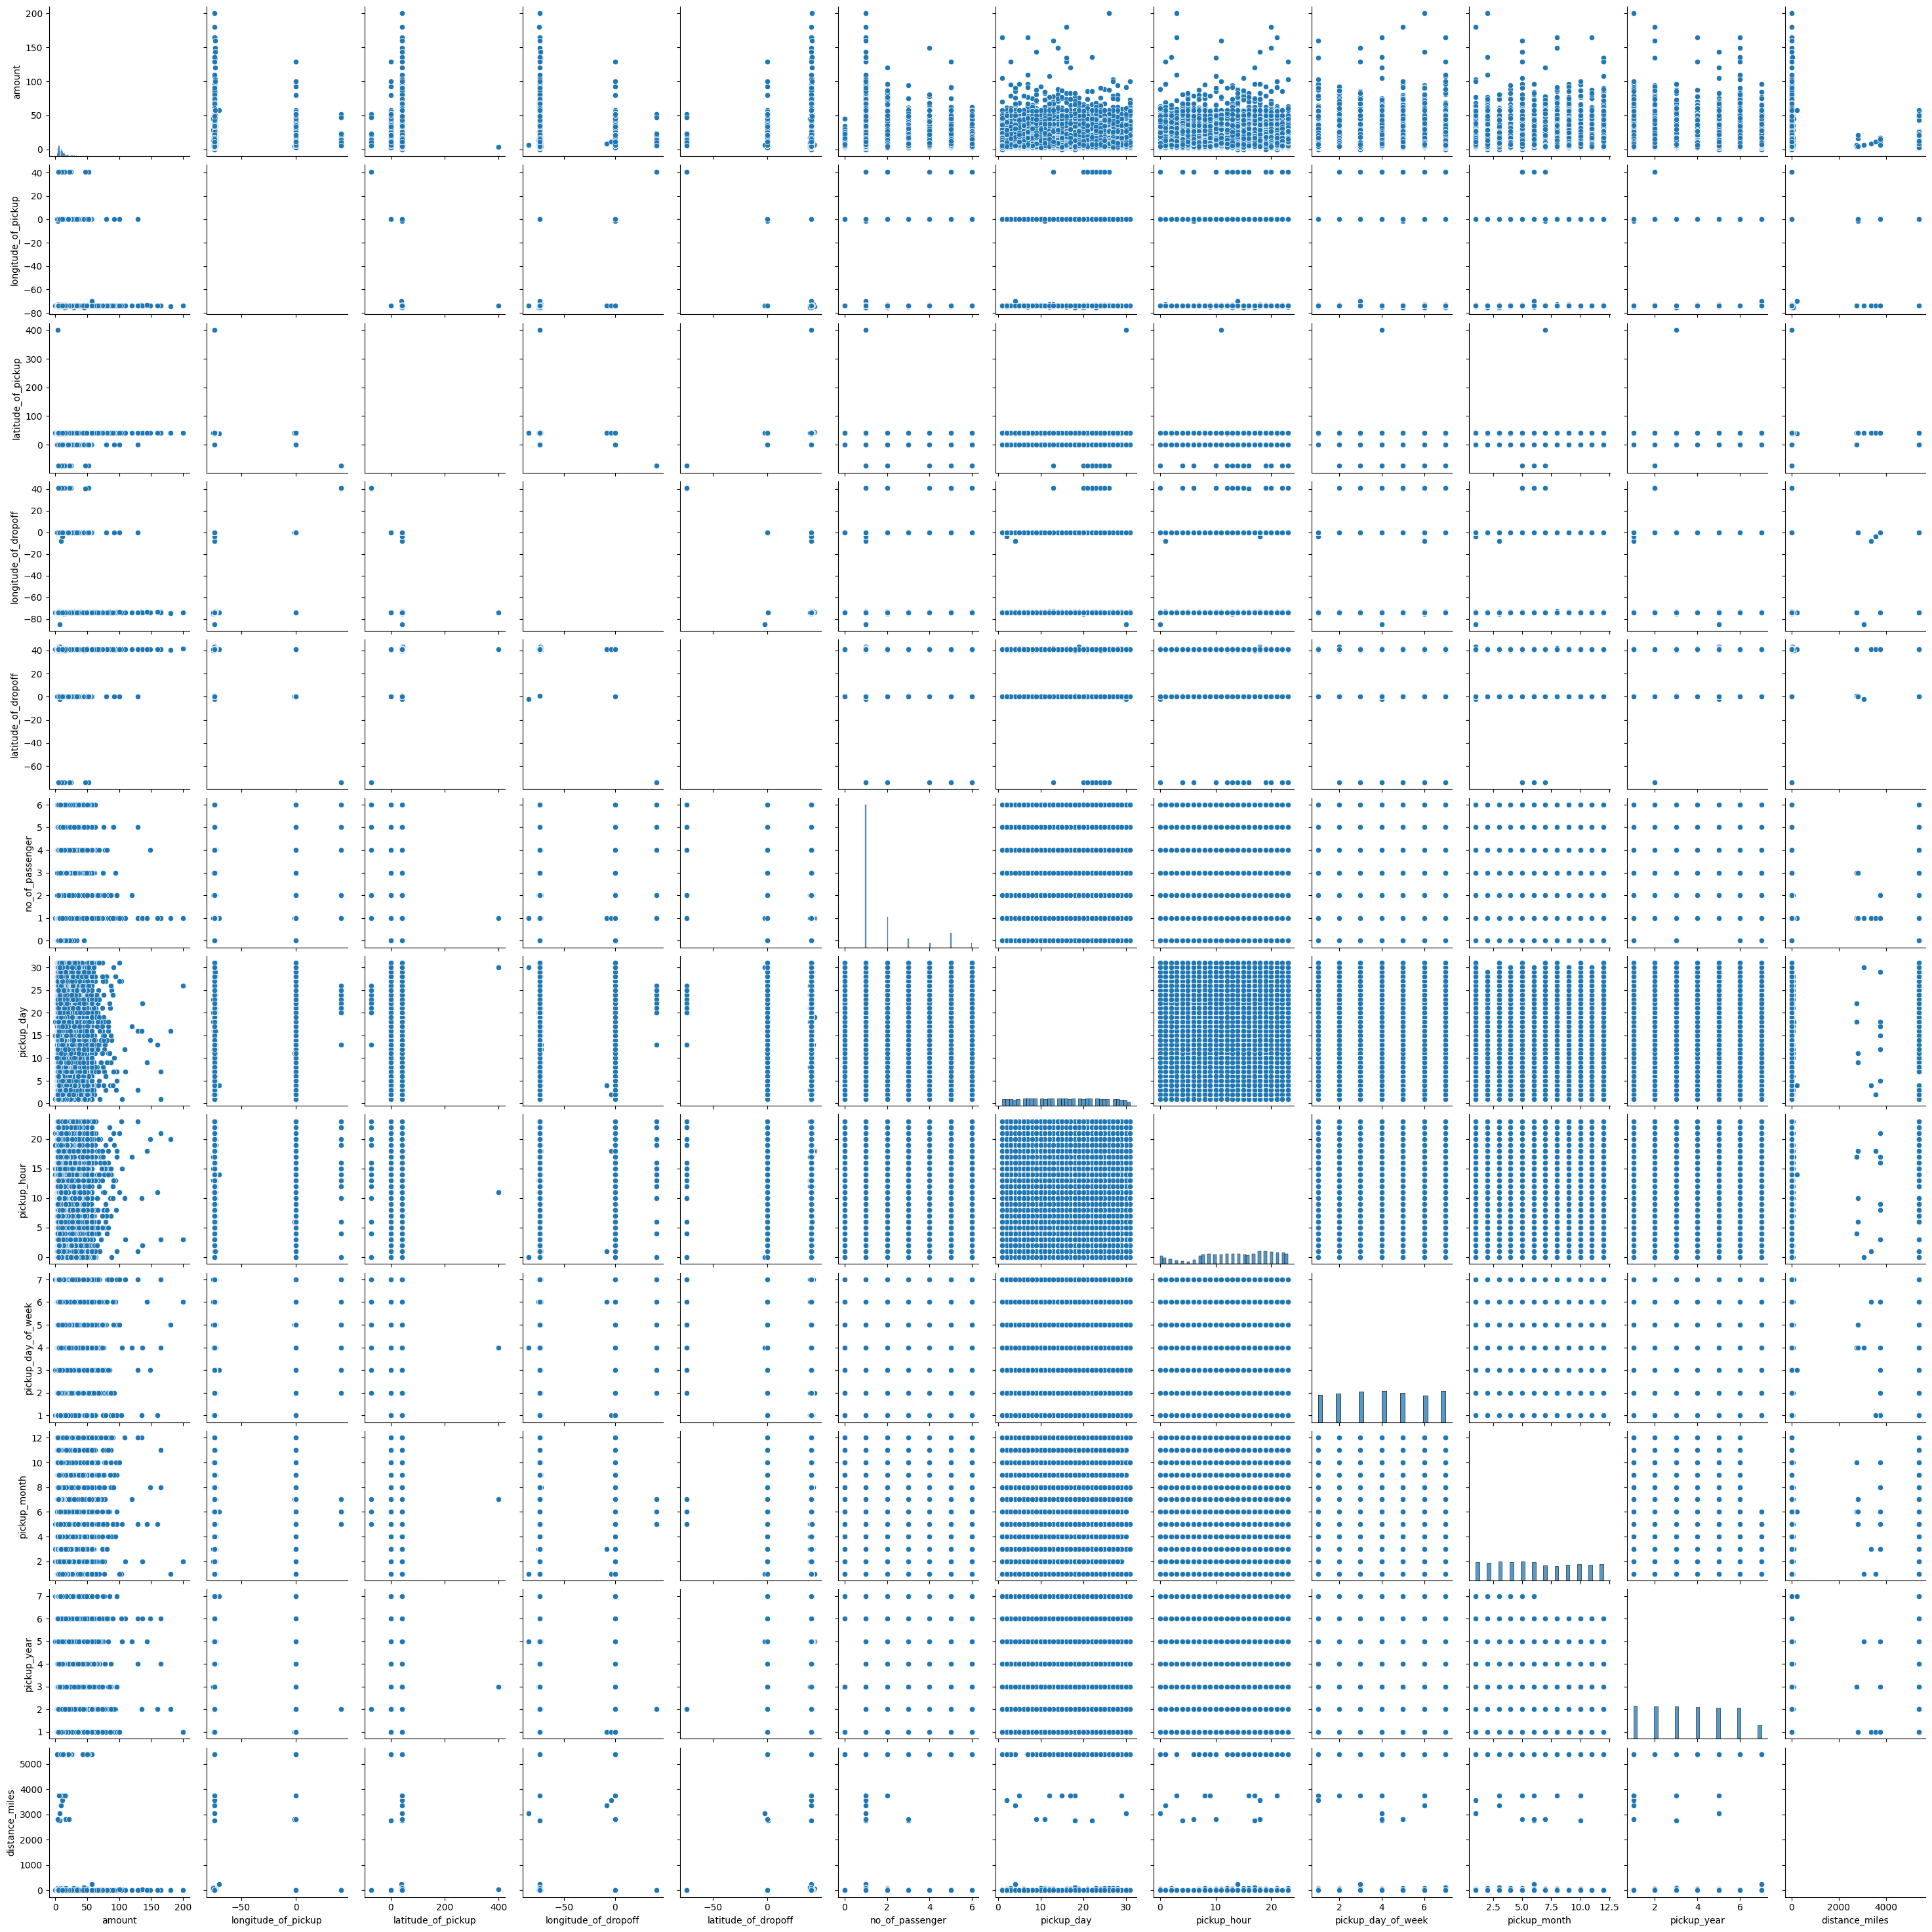

In [ ]:
sns.pairplot(df)

**FOR DecisionTreeRegressor**

In [43]:
from sklearn.tree import DecisionTreeRegressor
model_2=DecisionTreeRegressor(max_depth=4)
###over fit means good with train and bad with test data

In [44]:
model_2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [45]:
model_2.score(X_train,y_train)

0.7279763512780936

In [46]:
model_2.score(X_test,y_test)

0.7131405829513146

**For BaggingRegressor**

In [47]:
from sklearn.ensemble import BaggingRegressor
model_3=BaggingRegressor(n_estimators=90,base_estimator=model_2)

In [48]:
model_3.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                 n_estimators=90)

In [49]:
model_3.score(X_train,y_train)

0.7422782963340624

In [50]:
model_3.score(X_test,y_test)

0.7153313761872016

**for AdaBoostRegressor**

In [51]:
from sklearn.ensemble import AdaBoostRegressor
model_4=AdaBoostRegressor(n_estimators=30)
model_4.fit(X_train,y_train)

AdaBoostRegressor(n_estimators=30)

In [52]:
model_4.score(X_train,y_train)

0.5305661759740097

In [53]:
model_4.score(X_test,y_test)

0.5098380582926118

**for GradientBoostingRegressor**

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
model_5=GradientBoostingRegressor(n_estimators=30)
model_5.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=30)

In [55]:
model_5.score(X_train,y_train)

0.7698786498490826

In [56]:
model_5.score(X_test,y_test)

0.7320035962312362

**for RandomForestRegressor**

In [57]:
from sklearn.ensemble import RandomForestRegressor
model_6=RandomForestRegressor(n_estimators=30,max_features=5)
model_6.fit(X_train,y_train)


RandomForestRegressor(max_features=5, n_estimators=30)

In [58]:
model_6.score(X_train,y_train)

0.9649558966485338

In [59]:
model_6.score(X_test,y_test)

0.7777839824969164